# Bosques Aleatorios
## Paquetes

Inicialmente se procede a cargar los paquetes que se utilizarán para el algoritmo que se desea implementar sobre la base de datos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

## Base de datos
Ahora que se cuenta con todos los paquetes, se procede a cargar la base de datos con la información sobre la Diabetes.

In [2]:
# Carga de la base de datos.
df= pd.read_csv("diabetes.csv")

# Descipción de la base.
df.describe().round()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,4.0,121.0,69.0,21.0,80.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,115.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,127.0,37.0,1.0,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.0,2.0,81.0,1.0


In [3]:
# Muestra de la base de datos.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Ahora, con el fin de corroborar los tipos de variables con los que se va a trabajar, se utiliza la función `info()`, para asegurar de que todas las variables son numéricas.

In [4]:
# Información de la base de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## División de la base de datos
Una vez que se depuró la base de datos, se procede a realizar la división de la misma en el set de entrenamiento y prueba. Para esto, se importa la función `train_test_split()` del modulo `sklearn.model_selection`.

In [5]:
# Se importa la función para dividir el set de datos.
from sklearn.model_selection import train_test_split

# Se extrae la variable a predecir del set de datos, en este caso Outcome. De esta forma quedan variables independientes de la
# variable a predecir.
X = df.drop(["Outcome"],axis = 1)

# Se almacena la varible Outcome que depende de las demás.
Y = df.Outcome

# División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=0)

## Creación del modelo
Ahora que se cuenta con la data separada en sets de entranamiento y prueba, se procede a crear el modelo y a buscar aquel que mejor resultado obtenga.

In [6]:
#Rangos de valores a probar
valores_n_estimators = [25, 50, 100, 500, 1000, 1500, 2000]
valores_min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]

#Inicializamos variables para almacenar los mejores resultados
best_score = 0
best_n_estimators = 0
best_min_samples_leaf = 0

#Iterar sobre los valores
for i in valores_n_estimators:
    for j in valores_min_samples_leaf:

        #Entrenamos el modelo
        modelo = RandomForestClassifier(n_estimators=i, 
                                          random_state=1000,
                                          min_samples_leaf=j)
        modelo.fit(X_train, Y_train)
        
        #Calculamos el accuracy promedio
        score = modelo.score(X_test, Y_test)

        #Actualizamos los mejores resultados
        if score > best_score:
            best_score = score
            best_n_estimators = i
            best_min_samples_leaf = j

#Resultados
print("Mejor precisión encontrada:", best_score)
print("Mejor valor de n_estimators:", best_n_estimators)
print("Mejor valor de min_samples_leaf:", best_min_samples_leaf)

Mejor precisión encontrada: 0.8072916666666666
Mejor valor de n_estimators: 50
Mejor valor de min_samples_leaf: 5


In [10]:
# Se genera el modelo de bosque aleatorio de 100 árboles, con semilla 2024 y con un mínimo de 8 hojas por árbol.
BA_modelo = RandomForestClassifier(n_estimators = 50, 
                                   random_state = 1000,
                                   min_samples_leaf= 5)

## Modelo óptimo 
Ahora que corroboramos las varibales que mejor precisión entregan al modelo, se procede a definir el mismo.

In [11]:
BA_modelo.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=5, n_estimators=50, random_state=1000)

## Tablas y Gráficos
Finalmente, ya que se tiene toda la información del modelo, se procede a graficar los resultados.

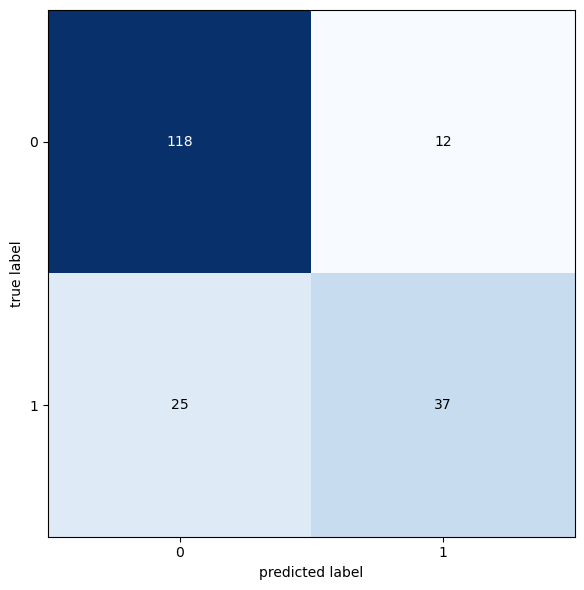

In [13]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Predicción del modelo usando los datos de prueba
Y_pred = BA_modelo.predict(X_test)
matriz = confusion_matrix(Y_test,Y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [14]:
# Importancias
importancias = BA_modelo.feature_importances_

# Nombre de las variables.
variables = [f"{col}" for col in X.columns]

# Dataframe a graficar.
bosque_importancias = pd.DataFrame({"Feature": variables, "Importance" : importancias})
bosque_importancias

,Feature,Importance
0,Pregnancies,0.065113
1,Glucose,0.326519
2,BloodPressure,0.068045
3,SkinThickness,0.049878
4,Insulin,0.068614
5,BMI,0.166798
6,DiabetesPedigreeFunction,0.098035
7,Age,0.156999


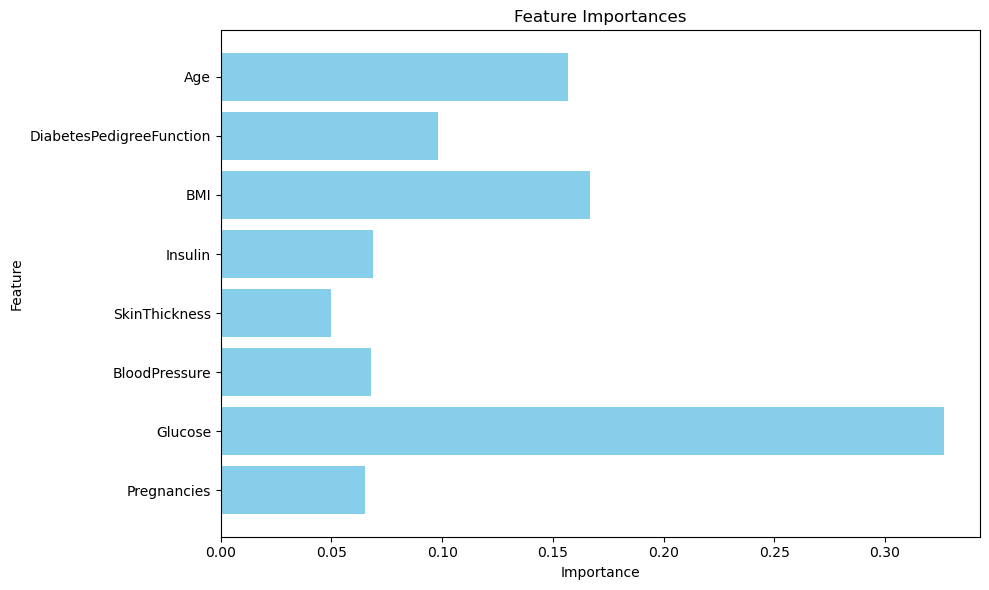

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(bosque_importancias["Feature"], bosque_importancias["Importance"], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()